# 1.1 data manipuleren postnl

In [27]:
pip install holidays --user

Note: you may need to restart the kernel to use updated packages.


In [38]:
pip install datetime --user

Note: you may need to restart the kernel to use updated packages.


In [63]:
#import packages
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



#import data
df_postnl=pd.read_csv('/datc/parcel/notebooks/data/postnl/20201014_300_klanten.csv', parse_dates=[0])

#klant 153 eruit halen
cust_filter = df_postnl['cust_id'] == 'klant_153'
df_postnl= df_postnl.where(cust_filter).dropna()
df_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
47,2015-01-02,klant_153,5019.0,0.0,train
307,2015-01-03,klant_153,0.0,2713.0,train
567,2015-01-04,klant_153,2713.0,7699.0,train
827,2015-01-05,klant_153,7699.0,7341.0,train
1087,2015-01-06,klant_153,7341.0,4414.0,train
...,...,...,...,...,...
504447,2020-04-25,klant_153,0.0,1311.0,test
504707,2020-04-26,klant_153,1311.0,2.0,test
504967,2020-04-27,klant_153,2.0,8256.0,test
505227,2020-04-28,klant_153,8256.0,4951.0,test


In [64]:
#2019 eruit halen
df_postnl_2019 = df_postnl.where(df_postnl['procesdag'].dt.year == 2019).dropna()
df_postnl_2019

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column
379647,2019-01-01,klant_153,1113.0,8226.0,train
379907,2019-01-02,klant_153,8226.0,8588.0,train
380167,2019-01-03,klant_153,8588.0,10061.0,train
380427,2019-01-04,klant_153,10061.0,0.0,train
380687,2019-01-05,klant_153,0.0,8791.0,train
...,...,...,...,...,...
473247,2019-12-27,klant_153,3250.0,0.0,validation
473507,2019-12-28,klant_153,0.0,3218.0,validation
473767,2019-12-29,klant_153,3218.0,4504.0,validation
474027,2019-12-30,klant_153,4504.0,4402.0,validation


# 1.2 data manipuleren feestdagen 

In [65]:
#feestdagen 2019
#Nieuwjaarsdag: maandag 1 januari.         (vast)
#Goede Vrijdag: 19 april.
#Pasen: zondag 21 april, maandag 22 april.
#Koningsdag: zaterdag 27 april.            (vast)
#Bevrijdingsdag: zondag 5 mei.             (vast)
#Hemelvaartsdag: donderdag 30 mei.
#Pinksteren: zondag 9 juni, maandag 10 juni.
#Kerst: woensdag 25 december, donderdag 26 december.   (vast) 

In [66]:
#bron: https://towardsdatascience.com/5-minute-guide-to-detecting-holidays-in-python-c270f8479387
from datetime import date 
from datetime import datetime
import holidays
  
# Select country 
nl_holidays = holidays.Netherlands() 
  
# Print all the holidays in Nederland in year 2019 
for ptr in holidays.Netherlands(years = 2019).items(): 
    print(ptr) 

(datetime.date(2019, 1, 1), 'Nieuwjaarsdag')
(datetime.date(2019, 4, 21), 'Eerste paasdag')
(datetime.date(2019, 4, 19), 'Goede Vrijdag')
(datetime.date(2019, 4, 22), 'Tweede paasdag')
(datetime.date(2019, 5, 30), 'Hemelvaart')
(datetime.date(2019, 6, 9), 'Eerste Pinksterdag')
(datetime.date(2019, 6, 10), 'Tweede Pinksterdag')
(datetime.date(2019, 12, 25), 'Eerste Kerstdag')
(datetime.date(2019, 12, 26), 'Tweede Kerstdag')
(datetime.date(2019, 4, 27), 'Koningsdag')


In [67]:
#lijst maken van feestdagen
nl_holidays =[] 
for date in holidays.Netherlands(years=2019).items():
    nl_holidays.append(str(date[0]))

#tying everything together
start_date = pd.datetime(year=2019,month=1,day=1)
end_date = pd.datetime(year=2019,month=12,day=31)
pd.date_range(start_date,end_date)

#data in dataframe zetten
df_feestdagen=pd.DataFrame()
df_feestdagen['Dates']=pd.date_range(start_date,end_date)

#gemanipuleerde data
df_feestdagen['Is_Holiday']= [
    1 if str(val).split()[0] in nl_holidays else 0 for val in df_feestdagen['Dates']
]
df_feestdagen= df_feestdagen.rename(columns={"Dates": "procesdag", "Is_Holiday": "feestdag"})
df_feestdagen

/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  import sys
/opt/jupyterhub/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  


,procesdag,feestdag
0,2019-01-01,1
1,2019-01-02,0
2,2019-01-03,0
3,2019-01-04,0
4,2019-01-05,0
...,...,...
360,2019-12-27,0
361,2019-12-28,0
362,2019-12-29,0
363,2019-12-30,0


# 1.3 gemanipuleerde data mergen

In [68]:
#df_feestdagen en df_postnl samenvoegen
df_feest_postnl = pd.merge(df_postnl_2019, df_feestdagen, on='procesdag')
df_feest_postnl

,procesdag,cust_id,aantal_pakketten,aantal_pakketten_volgende_dag,validation_column,feestdag
0,2019-01-01,klant_153,1113.0,8226.0,train,1
1,2019-01-02,klant_153,8226.0,8588.0,train,0
2,2019-01-03,klant_153,8588.0,10061.0,train,0
3,2019-01-04,klant_153,10061.0,0.0,train,0
4,2019-01-05,klant_153,0.0,8791.0,train,0
...,...,...,...,...,...,...
360,2019-12-27,klant_153,3250.0,0.0,validation,0
361,2019-12-28,klant_153,0.0,3218.0,validation,0
362,2019-12-29,klant_153,3218.0,4504.0,validation,0
363,2019-12-30,klant_153,4504.0,4402.0,validation,0


# 1.4 correlatie tussen de twee data

In [69]:
#correlatie feestdagen en postnldata
correlation_matrix =df_feest_postnl.corr()
correlation_matrix

,aantal_pakketten,aantal_pakketten_volgende_dag,feestdag
aantal_pakketten,1.000000,0.239273,-0.24024
aantal_pakketten_volgende_dag,0.239273,1.000000,-0.05239
feestdag,-0.240240,-0.052390,1.00000


In [70]:
#conclusie: lijkt geen correlatie hoge tussen de feestdagen en het aantal pakketten te zitten

# 1.5 model 

In [71]:
# Filters
from datetime import datetime
train_start = df_feest_postnl['procesdag'] >= datetime(year=2019, month=1, day=1)
train_end = df_feest_postnl['procesdag'] <= datetime(year=2019, month=8, day=1)
test_start = df_feest_postnl['procesdag'] >= datetime(year=2019, month=8, day=2)
test_end = df_feest_postnl['procesdag'] <= datetime(year=2019, month=12, day=31)

# Split train and test
train = df_feest_postnl.where(train_start & train_end).dropna()
test = df_feest_postnl.where(test_start & test_end).dropna()

# Define X and Y train
x_train = train[['feestdag']]
y_train = train[['aantal_pakketten']]

# Define X and Y test
x_test = test[['feestdag']]
y_test = test[['aantal_pakketten']]

In [72]:
#fit model
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [73]:
#make prediction
pred = lr.predict(x_test)

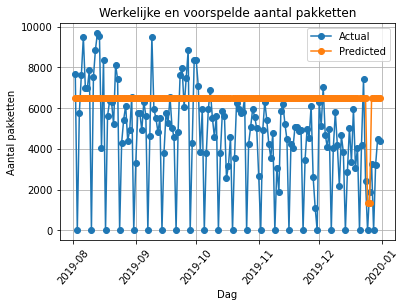

In [74]:
# Plot actual vs. predicted
fig, ax = plt.subplots()
ax.plot(test['procesdag'], y_test, label='Actual', marker='o')
ax.plot(test['procesdag'], pred, label='Predicted', marker='o')
ax.set(
    xlabel='Dag',
    ylabel='Aantal pakketten',
    title='Werkelijke en voorspelde aantal pakketten')
plt.xticks(rotation=50)
plt.grid()
plt.legend()
plt.show()

In [75]:
# Evaluate model
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)

print('Root Mean Squared Error:', rmse)
print('R2 score:', r2) 

Root Mean Squared Error: 3103.1286435358193
R2 score: -0.5611520039258691


# 1.6 conclusie

In [ ]:
#De RMSE is nog erg hoog en de R2 score is ook niet optimaal. Dit model kan wat aanpassingen gebruiken.